Difference from neid_fiesta_daily.ipynb:
Weightd average in the uncertainties 

In [1]:
import sys
sys.path.append('../src')

import numpy as np
import matplotlib.pyplot as plt
from PyAstronomy import pyasl
from datetime import datetime

from FIESTA_functions import *
from HARPS_N_functions import *
from NEID_solar_functions import *
from functions import *
#----------------------------------
# Read data
#----------------------------------


In [2]:
if 1:
    v_grid  = np.loadtxt('../lib/data_v4/v_grid.txt')
    CCF     = np.loadtxt('../lib/data_v4/CCF.txt')
    σCCF   = np.loadtxt('../lib/data_v4/σCCF.txt')
    bjd     = np.loadtxt('../lib/data_v4/bjd.txt')
    rv      = np.loadtxt('../lib/data_v4/rv.txt')
    σrv     = np.loadtxt('../lib/data_v4/σrv.txt')
    idx_rej = np.array(np.loadtxt('../lib/data_v4/idx_rej'), dtype=bool)
    
    # idx_v = (v_grid>90.25) & (v_grid<107.5)
    # v_grid = v_grid[idx_v]
    
    CCF = CCF[:,~idx_rej]
    σCCF = σCCF[:,~idx_rej]
    # CCF = CCF[idx_v,:]
    # σCCF = σCCF[idx_v,:]    
    bjd = bjd[~idx_rej]
    rv = rv[~idx_rej]
    σrv = σrv[~idx_rej]

In [3]:
weighted_avg_and_std(rv, 1/σrv**2)#, weighted_avg_and_std(rv_daily, 1/σrv_daily**2)

(-640.7388741816881, 1.4227938184859392)

In [4]:
# (0.48**2-np.mean(σrv)**2-0.28**2)**0.5

In [5]:
max(v_grid), min(v_grid)

(110.75, 87.25)

In [6]:
if 0:
    v_grid  = np.loadtxt('../lib/data_526_625/v_grid.txt')
    CCF     = np.loadtxt('../lib/data_526_625/CCF.txt')
    σCCF   = np.loadtxt('../lib/data_526_625/σ_CCF.txt')
    bjd     = np.loadtxt('../lib/data_526_625/bjd.txt')
    rv      = np.loadtxt('../lib/data_526_625/rv.txt')
    σrv     = np.loadtxt('../lib/data_526_625/σrv.txt')

    idx_t = (bjd<2459392) & (bjd>2459361)

    CCF = CCF[idx_v,idx_t]
    σCCF = σCCF[idx_v,idx_t]
    bjd = bjd[idx_t]
    rv = rv[idx_t]
    σrv = σrv[idx_t]


In [7]:
σCCF.shape, CCF.shape, v_grid.shape

((95, 31145), (95, 31145), (95,))

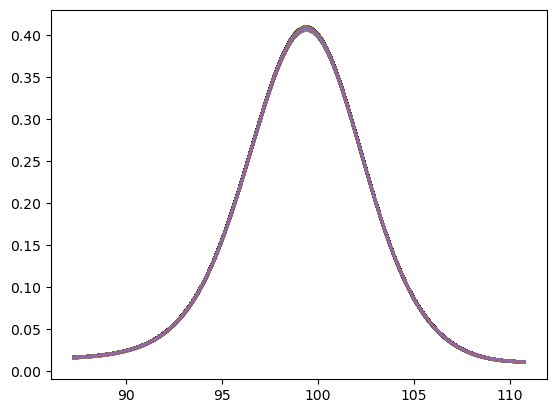

In [8]:
plt.plot(v_grid, CCF)
plt.show()

In [9]:
CCF.shape

(95, 31145)

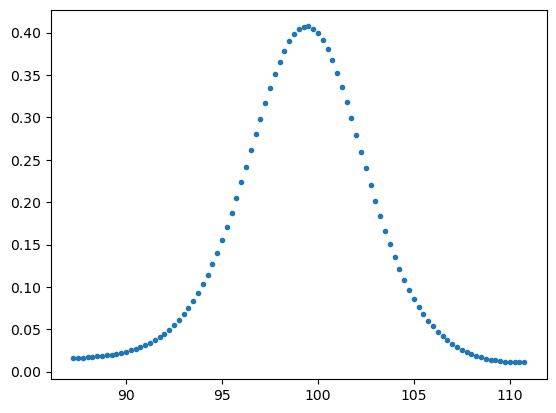

In [10]:
plt.plot(v_grid, CCF[:,0], '.')
plt.show()

In [11]:
# plt.plot(v_grid, (CCF.T-np.mean(CCF,axis=1)).T)
# plt.show()

Daily averages

<ErrorbarContainer object of 3 artists>

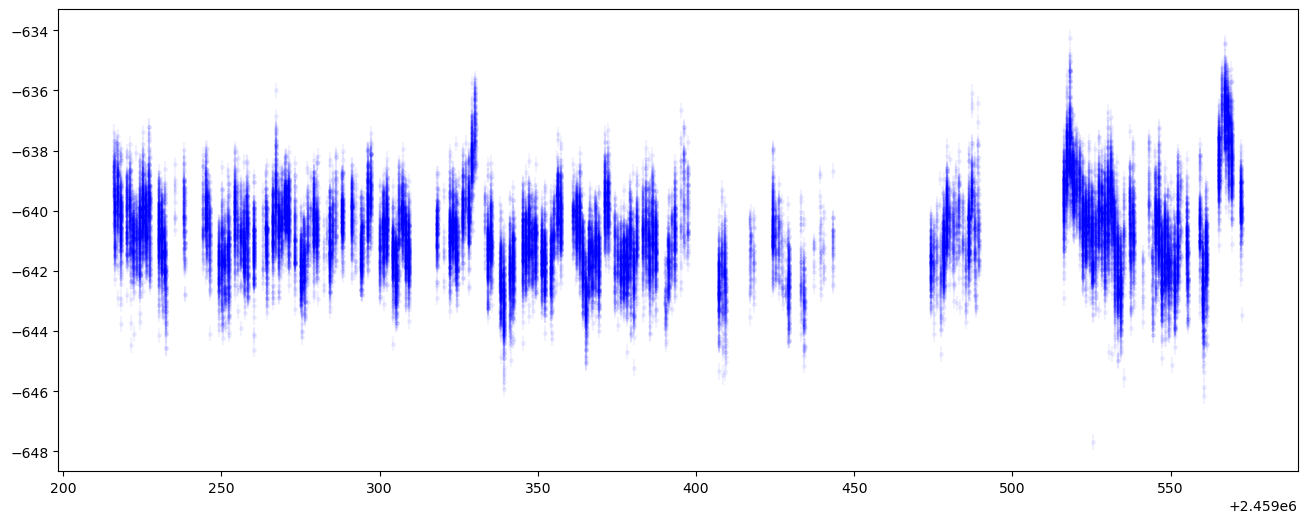

In [12]:
fig = plt.figure(figsize=(16, 6))
plt.errorbar(bjd, rv, σrv, marker='.', ms=5, color='blue', ls='none', alpha=0.05)

In [14]:
t_min = int(min(bjd))
t_max = int(max(bjd))
N = t_max -t_min + 1

bjd_daily 			= np.zeros(N)
CCF_daily 			= np.zeros((len(v_grid), N))
σCCF_daily			= np.zeros((len(v_grid), N))
rv_daily			= np.zeros(N)
# rv_raw_daily		= np.zeros(N)
σrv_daily			= np.zeros(N)

for n in range(N):
    idx = (bjd>(t_min+n)) & (bjd<(t_min+n+0.5))
    if len(bjd[idx])!=0:
        bjd_daily[n] = weighted_avg_1D(bjd[idx], 1/σrv[idx]**2)
        rv_daily[n] =  weighted_avg_1D(rv[idx], 1/σrv[idx]**2)
        σrv_daily[n] = 1/np.sqrt(np.sum(1/σrv[idx]**2))
        CCF_daily[:,n] = 1-weighted_avg_2D(1-CCF[:,idx], 1/σrv[idx]**2)
        σCCF_daily[:,n] = 1/np.sqrt(np.sum(1/σCCF[:,idx]**2, axis=1))

In [15]:
idx_0 		= (rv_daily==0)
rv_daily 	= rv_daily[~idx_0]
# rv_raw_daily= rv_raw_daily[~idx_0]
σrv_daily 	= σrv_daily[~idx_0]
bjd_daily 	= bjd_daily[~idx_0]
CCF_daily 	= CCF_daily[:,~idx_0]
σCCF_daily 	= σCCF_daily[:,~idx_0]

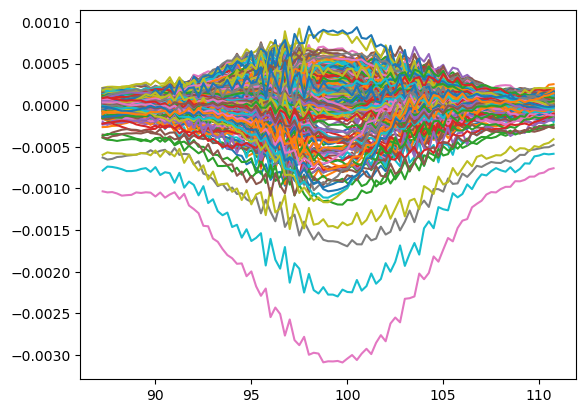

In [16]:
plt.plot(v_grid, (CCF_daily.T-np.mean(CCF_daily,axis=1)).T)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


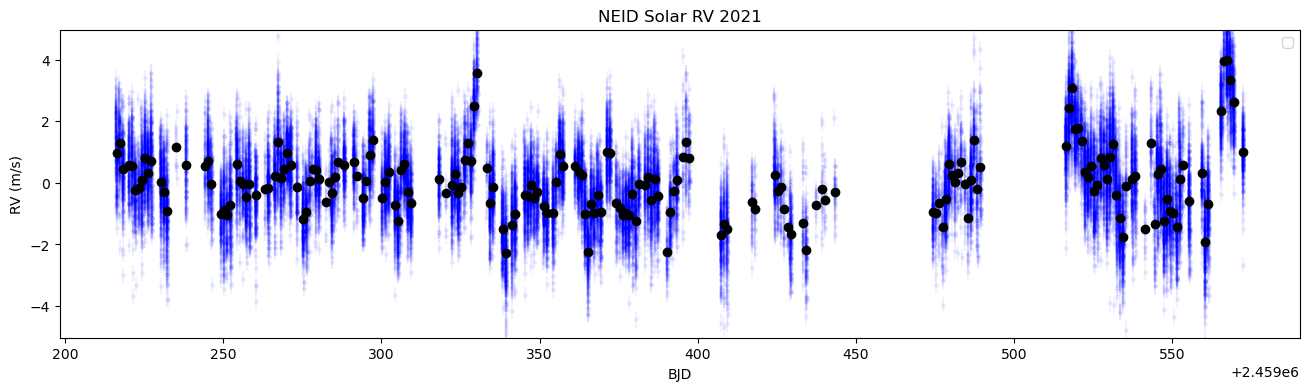

In [17]:
fig = plt.figure(figsize=(16, 4))
plt.errorbar(bjd, rv-np.mean(rv_daily), σrv, marker='.', ms=5, color='blue', ls='none', alpha=0.05)
plt.errorbar(bjd_daily, rv_daily-np.mean(rv_daily), σrv_daily, marker='.', ms=12, color='black', ls='none')
plt.ylim([np.median(rv-np.mean(rv_daily))-5, np.median(rv-np.mean(rv_daily))+5])
plt.title('NEID Solar RV 2021')
plt.xlabel('BJD')
plt.ylabel('RV (m/s)')
plt.legend()
plt.show()

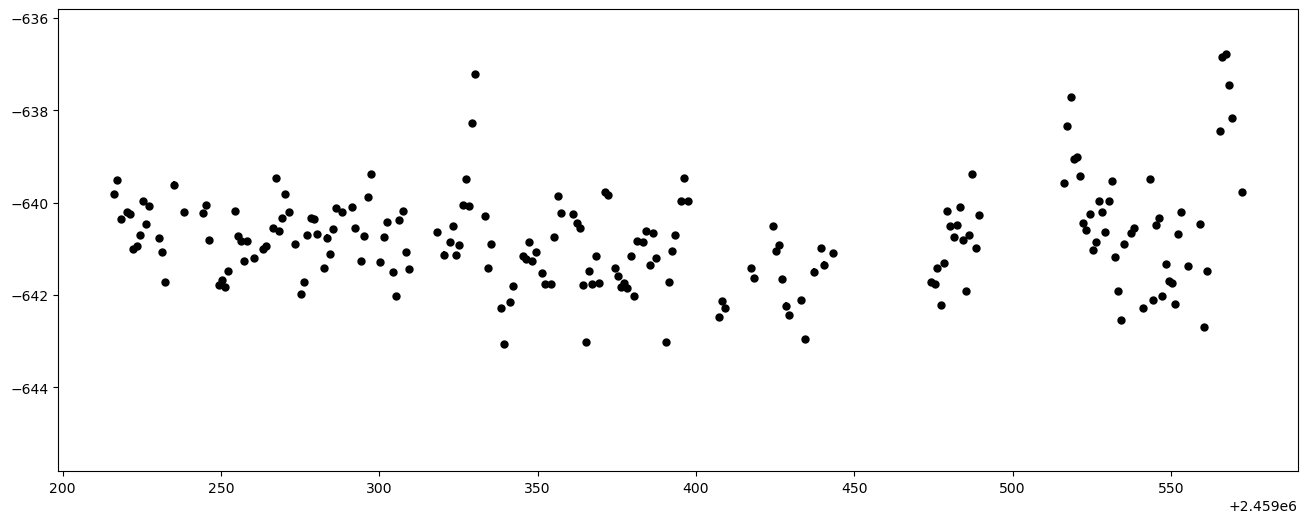

In [18]:
fig = plt.figure(figsize=(16, 6))
plt.errorbar(bjd_daily, rv_daily, σrv_daily, marker='.', ms=10, color='black', ls='none')
plt.ylim([np.median(rv)-5, np.median(rv)+5])
plt.show()

## FIESTA on daily CCF analysis

In [19]:
k_max = 55
df, RV_FT_k, eRV_FT_k, A_k, eA_k, RV_gauss = FIESTA(v_grid, CCF_daily, σCCF_daily, k_max=k_max)

RV_FT_k  *= 1000
eRV_FT_k *= 1000
RV_gauss *= 1000
ΔRV_k     = RV_FT_k - RV_gauss



Velocity grid used [87.25, 110.75]

ξ_normal = 1.98


The median SNR of all CCFs is 74808
ξ_modelling_noise = 1.98


Based on the user-defined SNR = 2.0:
ξ_individual = 1.98
ξ_timeseries = 1.73

In summary, the cut-off frequency for FIESTA is recommended to be 1.73 (41 frequency modes)

        ξ  individual_SNR  ts_SNR_A  ts_SNR_ϕ  modelling noise  \
0   0.000        179007.1     359.2       0.0          0.13662   
1   0.042        113824.0     125.4      34.6          0.04870   
2   0.084         42109.2      49.8      20.5          0.01186   
3   0.126         10340.3      25.6      11.7          0.00243   
4   0.168          2118.7      11.4       7.9          0.00055   
5   0.211           156.5       6.6      67.8          0.00052   
6   0.253           216.9       5.0       4.3          0.00045   
7   0.295           148.4       4.2       3.8          0.00042   
8   0.337           134.9       4.3       3.4          0.00039   
9   0.379           116.7       3.5       2.9      

In [ ]:
ΔRV_k.shape, RV_FT_k.shape, RV_gauss.shape

In [ ]:
# plt.plot(rv_daily-np.mean(rv_daily), np.average(RV_FT_k, weights=A_k, axis=0)-RV_gauss, '.')
# plt.show()
# plt.plot(rv_daily-np.mean(rv_daily), np.average(ΔRV_k, weights=A_k, axis=0), '.')
# plt.show()

In [ ]:
np.savetxt('../lib/FIESTA_daily_output/RV_FT_k.txt', RV_FT_k)
np.savetxt('../lib/FIESTA_daily_output/eRV_FT_k.txt', eRV_FT_k)
np.savetxt('../lib/FIESTA_daily_output/ΔRV_k.txt', ΔRV_k)
np.savetxt('../lib/FIESTA_daily_output/bjd_daily.txt', bjd_daily)
np.savetxt('../lib/FIESTA_daily_output/rv_daily.txt', rv_daily)
np.savetxt('../lib/FIESTA_daily_output/σrv_daily.txt', σrv_daily)

In [ ]:
RV_FT_k     = np.loadtxt('../lib/FIESTA_daily_output/RV_FT_k.txt')
eRV_FT_k    = np.loadtxt('../lib/FIESTA_daily_output/eRV_FT_k.txt')
ΔRV_k       = np.loadtxt('../lib/FIESTA_daily_output/ΔRV_k.txt')
bjd_daily   = np.loadtxt('../lib/FIESTA_daily_output/bjd_daily.txt')
rv_daily    = np.loadtxt('../lib/FIESTA_daily_output/rv_daily.txt')
σrv_daily   = np.loadtxt('../lib/FIESTA_daily_output/σrv_daily.txt')

## Plots 

In [ ]:
k_max = A_k.shape[0]

plot_all(k_mode=k_max, t=bjd_daily-2400000, rv=rv_daily, erv=σrv_daily, 
    ind=A_k, eind=eA_k, 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$A$',
    file_name='')
plt.show()



In [ ]:
plot_all(k_mode=k_max, t=bjd_daily-2400000, rv=rv_daily, erv=σrv_daily, 
    ind=ΔRV_k, eind=eRV_FT_k, 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$\Delta RV$',
    file_name='../Figures/Postdoc application/ΔRV_k.png',
    HARPS=False)
plt.show()

In [ ]:
plt.plot(np.median(eRV_FT_k, axis=1))

In [ ]:
plot_all(k_mode=k_max, t=bjd_daily-2400000, rv=rv_daily, erv=σrv_daily, 
    ind=RV_FT_k, eind=eRV_FT_k, 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$RV_{FT}$',
    file_name='')
plt.show()

# PCA

In [ ]:
k_max = 47
PC, weighted_pca_score, err_weighted_pca_score, n_pca = weighted_pca(X=ΔRV_k[:k_max,:].T, X_err=eRV_FT_k[:k_max,:].T, nor=False)

In [ ]:
plot_all(k_mode=7, t=bjd_daily, rv=rv_daily, erv=σrv_daily, 
    vlines = [13.4, 28.5, 365/2, 285, 400],
    ind=weighted_pca_score.T, eind=err_weighted_pca_score.T, 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{HARPS}$', 
    pe_xlabel='Period [days]',
    ind_yalbel='PC',
    height_ratio=0.4,
    file_name='')

# MLP

In [22]:
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses
from sklearn.utils import shuffle

# print(tf.VERSION)
print(tf.keras.__version__)

2.10.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def model_MLP(X, Y, bjd, σrv, lr_model, epochs=200, learning_rate=2e-4, kk=1):
# def model_MLP(X, Y, bjd, σrv, lr_model, epochs=200, learning_rate=2e-4):

 
    if 0:   
        scaler = StandardScaler()
        scaler.fit_transform(X)
    
    if 1: # random sample
        x_train, x_test, y_train, y_test, t_train, t_test, σrv_train, σrv_test = train_test_split(X, Y, bjd, σrv, test_size=0.3, random_state=random.randint(0, 10000))
    
    if 0: # consecutive sample
        kf = KFold(n_splits=4)
        i = 0
        for train_index, test_index in kf.split(X):
        # for test_index, train_index in kf.split(X): # note the shift between train_index and test_index (25% train and 75% test)
            i+=1
            if i==kk:
                t_train, y_train, σrv_train, x_train = bjd[train_index], Y[train_index], σrv[train_index], X[train_index]
                t_test, y_test, σrv_test, x_test = bjd[test_index], Y[test_index], σrv[test_index], X[test_index]

        print('x_train.shape', x_train.shape)
        print('x_test.shape', x_test.shape)
    
    batch_size= x_train.shape[0]

    ###################
    # hyperparameters #
    ###################
    # 1st to play with learning rate
    # 2nd batch size 
    # then epochs and activation functions 
    # batch_size = batch_size
    # epochs=epochs
    adam = Adam(learning_rate=learning_rate)

    if 0: # data type issue
        def custom_mse(y_test, y_pred):
            import keras.backend as K
            # calculating squared difference between target and predicted values 
            loss = K.square( (y_pred - y_test) / σrv_test)  # (batch_size, 2)                    
            # summing both loss values along batch dimension 
            loss = K.sum(loss, axis=1) / K.sum(K.square(1/σrv_test))        # (batch_size,)
            return loss

    if 1: # use this one 
        def custom_mse(y_test, y_pred):
            squared_difference = tf.dtypes.cast(tf.square((y_test - y_pred)/σrv_test), tf.float64) 
            return tf.dtypes.cast(tf.math.reduce_sum(squared_difference)/tf.math.reduce_sum(tf.square(1/σrv_test)), tf.float64)  # Note the `axis=-1`
    
    if 0:
        def custom_mse(y_test, y_pred):
            y_test = tf.dtypes.cast(y_test, tf.float64)
            y_pred = tf.dtypes.cast(y_pred, tf.float64)
            wrms = tf.dtypes.cast((tf.math.reduce_sum(tf.square((y_test - y_pred)/tf.dtypes.cast(σrv_test, tf.float64))) / tf.math.reduce_sum(tf.square(1/tf.dtypes.cast(σrv_test, tf.float64)))), tf.float64)
                                  # (tf.math.reduce_sum(tf.square((y_test - y_pred)/tf.dtypes.cast(σrv_test, tf.float64))) / tf.math.reduce_sum(tf.square(1/tf.dtypes.cast(σrv_test, tf.float64))))**0.5
            return wrms

    if 0: # data type issue
        def custom_mse(y_test, y_pred):
            weights=tf.square(1/tf.dtypes.cast(σrv_test, tf.float64))
            sum_weights = tf.reduce_sum(weights)
            resid = tf.reduce_sum(weights * tf.square(y_test - y_pred))
            return resid/sum_weights
        
    if 0: # this one does not work as the weights are by sample (requires two or more samples)
        def custom_mse(y_test, y_pred):
            mse = tf.keras.losses.MeanSquaredError()
            return mse(y_test, y_pred, sample_weight=tf.dtypes.cast((1/σrv_test)**2, tf.float64))
        


    # compile the model
    if 1:
        lr_model.compile(loss=custom_mse,
                      optimizer=adam,
                      metrics=[custom_mse])
    if 0:
        lr_model.compile(loss='mse',
                      optimizer=adam)    

    # from keras.callbacks import EarlyStopping
    # earlystop = EarlyStopping(monitor = 'val_mse',
    #                           min_delta = 0,
    #                           patience = 3,
    #                           verbose = 0,
    #                           restore_best_weights = True)

    # callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

    ### Fit the model
    lr_model_history = lr_model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        # callbacks = [callback],
                        validation_data=(x_test, y_test))
    
    y_pred = lr_model.predict(x_test)

    if 1:
        fig, ax = plt.subplots(1, 1)
        ax.plot(np.sqrt(lr_model_history.history['loss']), 'b', label='train')    
        ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'r' ,label='test')
        ax.set_xlabel(r'Epoch')
        ax.set_ylabel(r'wmse')
        ax.set_yscale('log')
        ax.legend()
        ax.tick_params(labelsize=20)
        ax.grid()
        plt.show()

    # if 0:        
        plt.plot(t_test, y_test, 'r.', label='test')
        plt.plot(t_test, y_pred, 'k.', label='pred')
        plt.ylabel('RV [m/s]')
        plt.legend()
        plt.show()
        
    # if 0:
        plt.plot(y_test, y_pred, 'b.')
        plt.xlabel('test [m/s]')
        plt.ylabel('pred [m/s]')
        plt.show()    

    ave, std = weighted_avg_and_std(y_pred[:,0]-y_test, 1/σrv_test**2)
    print(std)
    
    return lr_model_history, y_test, y_pred[:,0], σrv_test, t_test, std
    

### use RV_FT_k as features and predict the shifted RV

add noise in the CCF level and repeat 
or do not repeat 

In [ ]:
# Add ramdom RV shift 
run = 10
weights = np.zeros((run, RV_FT_k.shape[0]))
for i in range(run):
    random_rv_shift = np.random.rand(len(rv_daily))*10

    X = (RV_FT_k+random_rv_shift).T
    Y = random_rv_shift

    ###################
    # build the model #
    ###################
    input_dim = X.shape[1]
    lr_model = Sequential()
    lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))
    lr_model, y_test, y_pred, σrv_test, bjd_test, std  = model_MLP(X, Y, bjd_daily, σrv_daily, lr_model, epochs=5000, learning_rate=5e-3)
    weights[i,:] = lr_model.get_weights()[0].flatten()
    

In [ ]:
random_rv_shift = np.random.rand(len(rv_daily))*1
X = (RV_FT_k+random_rv_shift).T
Y = random_rv_shift
###################
# build the model #
###################
lr_model = Sequential()
lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))
lr_model_history, y_test, y_pred, σrv_test, bjd_test, std  = model_MLP(X, Y, bjd_daily, σrv_daily, lr_model, epochs=5000, learning_rate=5e-3)


In [ ]:
# from keras.utils import plot_model

# plot_model(lr_model)

In [ ]:
from sklearn.linear_model import LinearRegression
import cv2

img_array = []
rms = np.zeros(47)

for i in range(47):
    n_feature = i+1
    X_feature = RV_FT_k[:n_feature]
    X = (X_feature+random_rv_shift).T
    Y = random_rv_shift

    # X = RV_FT_k.T
    # Y = np.zeros(len(rv_daily))

    reg = LinearRegression().fit(X, Y, sample_weight=1/σrv_daily**2)
    # print(reg.score(X, Y), 
    #       reg.coef_, 
    #       reg.intercept_)
    
    fig = plt.figure()
    plt.plot(reg.coef_, 'ko-')
    plt.xlabel('Frequency mode')
    plt.ylabel('Mode amplitude')
    plt.xlim([-1, 48])
    plt.ylim([-0.65,1.05])
    
    filename = '../Figures/Mode amplitude/' + str(n_feature) + '.png'
    plt.savefig(filename)
    plt.close()
    
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width, height)
    img_array.append(img)

    y_pred = reg.predict(X_feature.T)
    rms[i]=np.std(y_pred)
    
out = cv2.VideoWriter('../Videos/Mode amplitude.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 10, size) 
for i in range(len(img_array)):
	out.write(img_array[i])
out.release()

In [ ]:
plt.plot(np.arange(47)+1, rms)
plt.xlabel('frequency modes used')
plt.ylabel('rms')

In [ ]:
from sklearn.linear_model import LinearRegression
import cv2

img_array = []
rms = np.zeros(47)

for i in range(47):
    n_feature = i+1

    X = ΔRV_k[:n_feature].T
    Y = rv_daily - np.mean(rv_daily)

    reg = LinearRegression().fit(X, Y, sample_weight=1/σrv_daily**2)
    # print(reg.score(X, Y), 
    #       reg.coef_, 
    #       reg.intercept_)
    
    fig = plt.figure()
    plt.plot(reg.coef_, 'ko-')
    plt.xlabel('Frequency mode')
    plt.ylabel('Mode amplitude')
    # plt.xlim([-1, 48])
    # plt.ylim([-0.65,1.05])
    
    filename = '../Figures/Mode amplitude 2/' + str(n_feature) + '.png'
    plt.savefig(filename)
    plt.close()
    
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width, height)
    img_array.append(img)

    y_pred = reg.predict(X)
    rms[i]=np.std(y_pred-Y)
    
out = cv2.VideoWriter('../Videos/Mode amplitude 2.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 10, size) 
for i in range(len(img_array)):
	out.write(img_array[i])
out.release()

In [ ]:
plt.plot(np.arange(47)+1, rms)
plt.xlabel('frequency modes used')
plt.ylabel('rms')

In [ ]:
# np.sqrt(lr_model_history.history['loss'])[-5:], lr_model_history.history['val_loss'][-5:]

In [ ]:
# np.random.rand(3,2)+ np.array([1,2])*10, (RV_FT_k+random_rv_shift).shape


In [ ]:
for i in range(run):
    plt.plot(abs(np.median(weights,axis=0).T), 'ko-', alpha=1)
    plt.plot(abs(weights.T), 'o-', alpha=0.1)
    plt.xlabel('mode')
    plt.ylabel('weights')
    plt.yscale('log')
    # plt.legend()
plt.show()    

In [ ]:

plt.plot(bjd_daily, weighted_avg_2D(X, weights=lr_model.get_weights()[0].flatten()), 'r.', label='weighted average')
plt.plot(bjd_daily, Y, 'b.', label='injected RV')
# plt.xlim([min(bjd_daily), max(bjd_daily) ])
# plt.legend()
plt.show()

### use ΔRV_k as input features

In [ ]:
# X = ΔRV_k.T[:,0:10]
X = ΔRV_k.T
Y = rv_daily - np.mean(rv_daily) #+ 0.1*np.sin((bjd_daily-min(bjd_daily))*10)
print(X.shape, Y.shape)
###################
# build the model #
###################
input_dim = X.shape[1]
lr_model = Sequential()
# lr_model.add(Dense(32, activation=tf.nn.relu, kernel_initializer='uniform', 
#                 input_dim = input_dim)) 
# lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(16, activation=tf.keras.activations.linear, kernel_initializer='uniform', 
#                 input_dim = input_dim)) # add bias term!
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.tanh))
lr_model.add(Dense(1, activation=tf.keras.activations.linear, kernel_initializer='uniform', 
                input_dim = input_dim))

# lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))

lr_model_history, y_test, y_pred, σrv_test, bjd_test, std = model_MLP(X, Y, bjd_daily, σrv_daily, lr_model, epochs=1500, learning_rate=1e-3)



# Simultaneously fit planetary and stellar RV

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import backend as K
import tensorflow as tf
from sklearn.model_selection import train_test_split
np.random.seed(0)
tf.keras.backend.set_floatx('float32')


In [26]:
X = ΔRV_k.T
Y = rv_daily - np.mean(rv_daily) #+ 0.1*np.sin((bjd_daily-min(bjd_daily))*10)
# X = ΔRV_k[:,:150].T
# Y = rv_daily[:150] - np.mean(rv_daily) #+ 0.1*np.sin((bjd_daily-min(bjd_daily))*10)
# Number of features used to predict "RV"
n_feat = X.shape[1]

# Make random signal
# X = your RV features, y = the real RVs, and t = time
y = Y
t = bjd_daily### optimisation 

rms = 0.24552382686943414


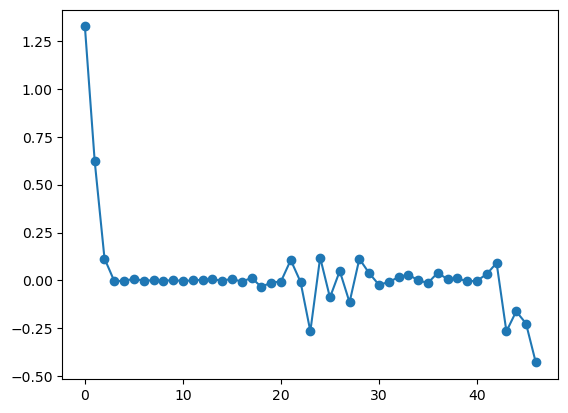

In [27]:

from scipy import optimize

def loss(params):
    diff = np.sum(params[:47]*X, axis=1) + params[47] - Y
    _, wrms = weighted_avg_and_std(diff, 1/σrv_daily**2)
    return wrms
    
initial_guess = np.zeros(48)
result = optimize.minimize(loss, initial_guess)
if result.success:
    fitted_params = result.x
    print('rms =', loss(fitted_params))
else:
    raise ValueError(result.message)    

plt.plot(fitted_params[:47], 'o-')      

### include an injected planet 

In [281]:
N = 100
amp = np.logspace(-2, 2, N)
amp_pred = np.zeros(N)
w_array = np.zeros((N, 47))
rms_array = np.zeros(N)
phase_array = np.zeros(N)
initial_guess = np.zeros(50)


def loss(params):    
    diff = np.sum(params[:47]*X, axis=1) + params[47] + params[48] * np.sin(t+params[49]) - y
    _, wrms = weighted_avg_and_std(diff, 1/σrv_daily**2)
    return wrms

for i in range(N):
    y = Y + amp[i] * np.sin(t+1)

    result = optimize.minimize(loss, initial_guess)
    fitted_params = result.x
    # print(fitted_params)
    # print('rms =', loss(fitted_params))
    w_array[i] = fitted_params[:47]
    amp_pred[i] = fitted_params[48]
    phase_array[i] = fitted_params[49]
    rms_array[i] = loss(fitted_params)
    
# plt.plot(fitted_params[:47], 'o-')    

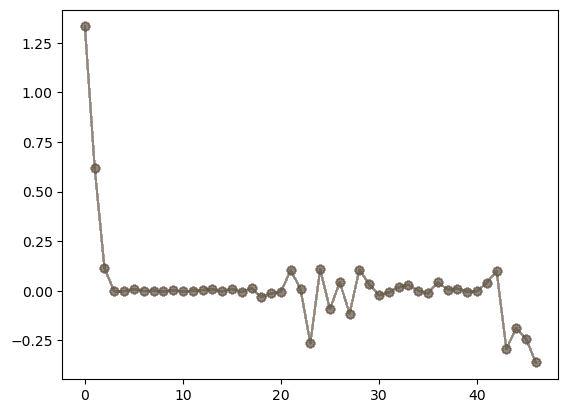

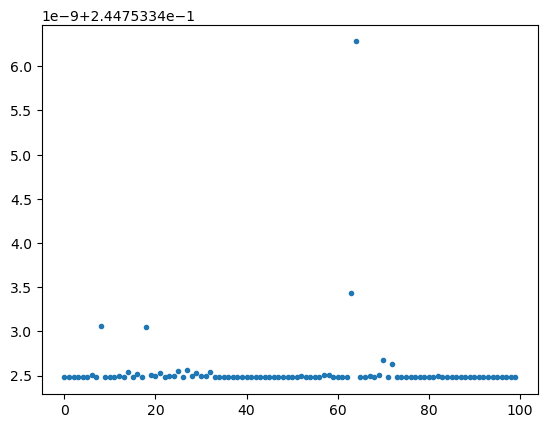

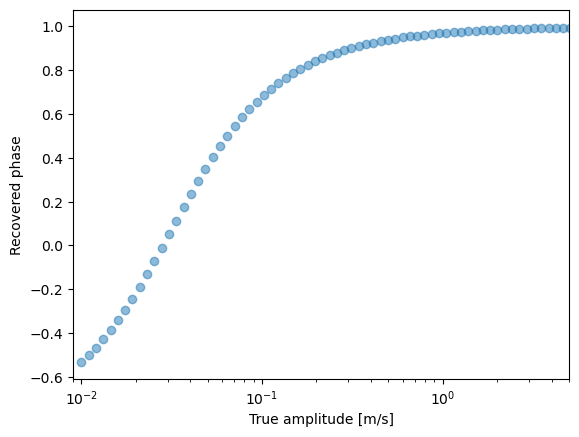

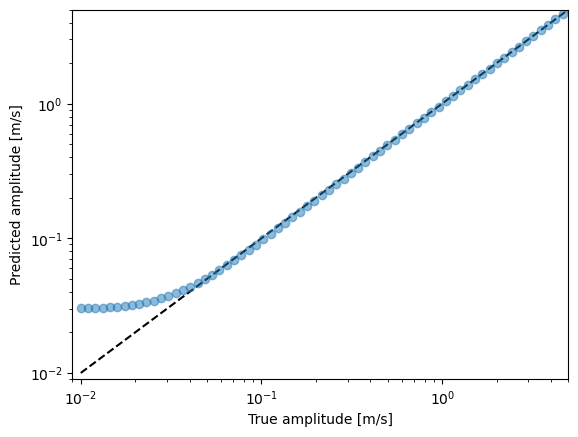

In [289]:
plt.plot(w_array.T, 'o-', alpha=0.01)    
plt.show()

plt.plot(rms_array, '.')
plt.show()

plt.plot(amp, phase_array, 'o', alpha=0.5)
plt.xscale('log')
plt.xlim([0.009, 5])
plt.xlabel('True amplitude [m/s]')
plt.ylabel('Recovered phase')
plt.show()


plt.plot(amp, amp, 'k--')
plt.plot(amp, amp_pred, 'o', alpha=0.5)
plt.xlabel('True amplitude [m/s]')
plt.ylabel('Predicted amplitude [m/s]')
plt.xlim([0.009, 5])
plt.ylim([0.009, 5])
plt.xscale('log')
plt.yscale('log')

### add period 

In [352]:
def loss(params):    
    diff = np.sum(params[:47]*X, axis=1) + params[47] + params[48] * np.sin((t-min(t))*2*np.pi/(10**params[50]) + params[49]) - y
    _, wrms = weighted_avg_and_std(diff, 1/σrv_daily**2)
    return wrms

initial_guess[50] = 1.

y = Y + 2 * np.sin((t-min(t))*2*np.pi/10+1)
result = optimize.minimize(loss, initial_guess, method= "Nelder-Mead")
fitted_params = result.x
print(fitted_params[48:])
print('rms =', loss(fitted_params))

[-1.45034847e-02  1.57691467e-01  7.29465796e+01]
rms = 1.4493846133534662


In [34]:
def loss(params):    
    diff = (np.sum(params[:47]*X, axis=1) + params[47] 
            + params[48] * np.sin((t-min(t))*2*np.pi/(10*params[50])+ params[49]) - y)
    _, wrms = weighted_avg_and_std(diff, 1/σrv_daily**2)
    return wrms

initial_guess = np.zeros(51)
# initial_guess[48] = np.log(np.std(y))
initial_guess[50] = 10/10


from scipy.optimize import basinhopping
from scipy.optimize import shgo
from scipy.optimize import dual_annealing

y = Y + 2 * np.sin((t-min(t))*2*np.pi/10+1)
lw = [-2.]*51
up = [3.]*51
bounds=list(zip(lw, up))
# bounds = [(None, None), ]*51
# ret = basinhopping(loss, initial_guess,  niter_success=20, niter=1000)
ret = dual_annealing(loss, bounds=bounds)
print(ret.x, ret.fun)

[ 1.25112560e+00  1.01722683e+00  2.48974754e-01  1.34520538e-02
 -7.30097708e-03  7.93191046e-03 -2.75253278e-02 -5.93701834e-03
  2.68020411e-04  2.57395181e-03 -9.23384923e-03  2.25757214e-02
  2.01185835e-02  9.65327890e-03  3.72379478e-02  1.99964220e-02
  2.17846992e-02  9.54405325e-03 -1.38701471e-02 -7.43913673e-02
  1.57518468e-01  2.40900725e-01  4.04988168e-01  6.10666509e-01
 -7.12948054e-01 -7.64219008e-01 -4.34704992e-01 -7.42584742e-02
 -1.95034311e-01 -1.65224490e-01  2.44778449e-02 -1.87951566e-02
  2.19688713e-02 -4.80501029e-02  7.16600071e-03 -3.31208587e-02
  1.58915359e-01 -2.30377687e-02  2.30418784e-02 -7.53529372e-02
 -9.37976633e-02 -1.21534998e-01  4.10689794e-01 -1.38442467e+00
  4.10128344e-01 -1.50746327e+00  1.96502925e+00  5.37515492e-01
  3.28198191e-01  1.90758150e+00  2.74223500e+00] 1.3016854565141707


In [ ]:
def loss(params):    
    diff = (np.sum(params[:47]*X, axis=1) + params[47] 
            + params[48] * np.sin((t-min(t))*2*np.pi/(10*params[50])+ params[49]) - y)
    _, wrms = weighted_avg_and_std(diff, 1/σrv_daily**2)
    return wrms

initial_guess = np.zeros(51)
# initial_guess[48] = np.log(np.std(y))
initial_guess[50] = 9.5/10


from scipy.optimize import basinhopping
from scipy.optimize import shgo

y = Y + 2 * np.sin((t-min(t))*2*np.pi/10+1)
bounds = [(-3, 3), ]*51
# ret = basinhopping(loss, initial_guess,  niter_success=20, niter=1000)
ret = shgo(loss, bounds)
print(ret.x, ret.fun)

In [304]:
N = 5
amp = np.logspace(-2, 2, N)
amp_pred = np.zeros(N)
w_array = np.zeros((N, 47))
rms_array = np.zeros(N)
phase_array = np.zeros(N)
period_array = np.zeros(N)
initial_guess = np.zeros(51)

def loss(params):    
    diff = np.sum(params[:47]*X, axis=1) + params[47] + params[48] * np.sin(t*params[50] + params[49]) - y
    _, wrms = weighted_avg_and_std(diff, 1/σrv_daily**2)
    return wrms

for i in range(N):
    y = Y + amp[i] * np.sin(t*3+1)

    result = optimize.minimize(loss, initial_guess)
    fitted_params = result.x
    # print(fitted_params)
    # print('rms =', loss(fitted_params))
    w_array[i] = fitted_params[:47]
    amp_pred[i] = fitted_params[48]
    phase_array[i] = fitted_params[49]
    period_array[i] = fitted_params[50]
    rms_array[i] = loss(fitted_params)
    
# plt.plot(fitted_params[:47], 'o-')    

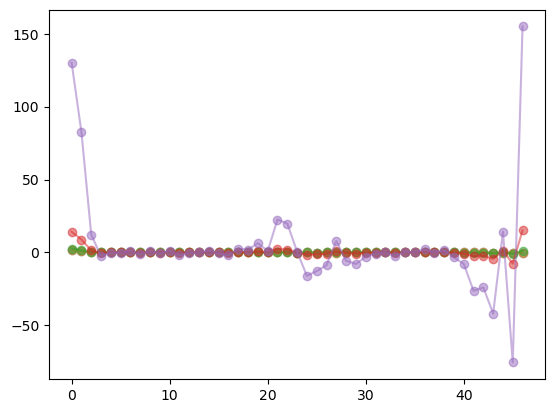

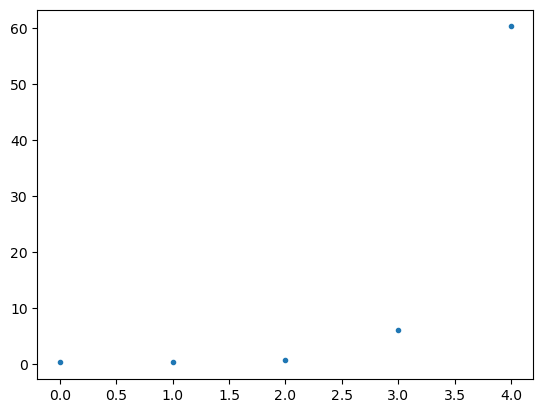

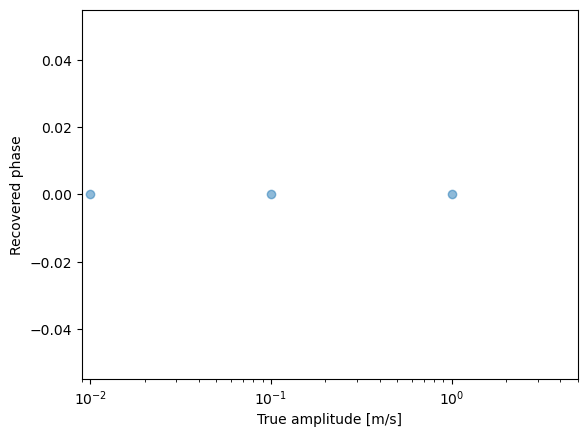

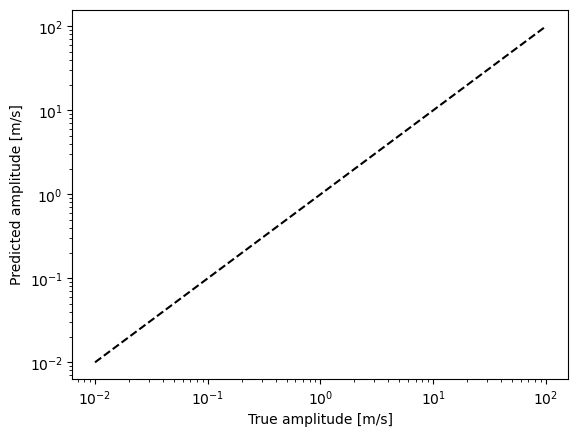

In [300]:
plt.plot(w_array.T, 'o-', alpha=0.5)    
plt.show()

plt.plot(rms_array, '.')
plt.show()

plt.plot(amp, phase_array, 'o', alpha=0.5)
plt.xscale('log')
plt.xlim([0.009, 5])
plt.xlabel('True amplitude [m/s]')
plt.ylabel('Recovered phase')
plt.show()


plt.plot(amp, amp, 'k--')
plt.plot(amp, amp_pred, 'o', alpha=0.5)
plt.xlabel('True amplitude [m/s]')
plt.ylabel('Predicted amplitude [m/s]')
# plt.xlim([0.009, 5])
# plt.ylim([0.009, 5])
plt.xscale('log')
plt.yscale('log')

In [290]:
X = ΔRV_k.T
Y = rv_daily - np.mean(rv_daily) #+ 0.1*np.sin((bjd_daily-min(bjd_daily))*10)
# X = ΔRV_k[:,:150].T
# Y = rv_daily[:150] - np.mean(rv_daily) #+ 0.1*np.sin((bjd_daily-min(bjd_daily))*10)
# Number of features used to predict "RV"
n_feat = X.shape[1]

# Make random signal
# X = your RV features, y = the real RVs, and t = time
y = Y
t = bjd_daily

print(X.shape, y.shape)

# Add sinusoidal to everything
y = y + 0.5 * np.sin(t*3+2)

X_train, X_test, y_train, y_test, t_train, t_test, σrv_daily_train, σrv_daily_test = train_test_split(
    X, y, t, σrv_daily, test_size=0.33, random_state=random.randint(0, 10000))

(202, 47) (202,)


In [291]:
# This custom layer has 2 inputs and 1 output
# First input = the RV prediction from the NN
# Second input = the time of observation, which gets put into the sine function
#It has 1 free parameters, the amplitude of that sine wave

class MakeSine(keras.layers.Layer):

  def __init__(self, units=1):
      super(MakeSine, self).__init__()
      # Units will be number of free parameters for the periodic signal.
      # Here it's just amplitude
      self.units = units

  # Weird bug with input shape here...ignoring it :) 
  def build(self, input_shape): 
    w_init = tf.random_normal_initializer()
    m_init = tf.random_normal_initializer()
    # t_init = tf.random_normal_initializer()
    t_init = tf.random_uniform_initializer(minval=0, maxval=2*np.pi/100)

    self.w = tf.Variable(
        initial_value = w_init(shape=(1, self.units),
                             dtype='float32'), trainable=True)
    self.m = tf.Variable(
        initial_value = w_init(shape=(1, self.units),
                             dtype='float32'), trainable=True)
    self.t = tf.Variable(
        initial_value = t_init(shape=(1, self.units),
                          dtype='float32'), trainable=True)
    
        
  def call(self, input1, input2):
    	#Makes amplitude always positive
        # return input1 + (10.**self.w) * tf.sin(input2)
        return input1 + (10.**self.w) * tf.sin(input2 * 10.**self.m + 100.*self.t)
        # return input1 + (10.**self.w) * tf.sin(input2 + 10.**self.t)
        # return input1 + (10.**self.w) * tf.sin(input2 + 100.*self.t)

# def custom_loss(y_true, y_pred):
#   return K.mean(K.square(y_pred - y_true), axis=-1)

if 1: # use this one 
    def custom_mse(y_test, y_pred):
        squared_difference = tf.dtypes.cast(tf.square((y_test - y_pred)/σrv_daily_test), tf.float64) 
        return tf.dtypes.cast(tf.math.reduce_sum(squared_difference)/tf.math.reduce_sum(tf.square(1/σrv_daily_test)), tf.float64)  # Note the `axis=-1`

if 0:
    def custom_mse(y_test, y_pred):
        # calculating squared difference between target and predicted values 
        loss = K.square( (y_pred - y_test) / σrv_daily_test)  # (batch_size, 2)                    
        # summing both loss values along batch dimension 
        loss = K.sum(loss, axis=-1) / K.sum(K.square(1/σrv_daily_test))        # (batch_size,)
        return loss

In [292]:
def Model():
    # Make the model and make sure the graphs looks right
    from tensorflow.keras import layers

    # So I have 2 inputs: the RV features ("X") and the time of each ("t")
    feat_input = layers.Input(shape=(n_feat,))
    time_input = layers.Input(shape=(1,))

    # The RV goes into the first NN
    # nn1 = layers.Dense(8, activation="relu")(feat_input)
    # nn1 = layers.Dense(1, activation="relu")(nn1)

    nn1 = layers.Dense(1, activation="linear")(feat_input)
    
    # nn1 = layers.Dense(8, activation="relu")(feat_input)
    # nn1 = layers.Dense(1, activation="relu")(nn1)    

    # The second input, t, goes into the sine wave
    # We put the output of the NN into there, to add in the sine wave
    nn2 = MakeSine()(nn1, time_input)

    # So our final model has 2 inputs, 1 output
    model = keras.Model(inputs=[feat_input, time_input], outputs=nn2)
    
    return model

# from keras.utils import plot_model

# plot_model(model)

In [293]:
# I made a custom loss, but it is just MSE! But you should feel free to edit
# the loss as you wish!
model = Model()
model.compile(loss=custom_mse, optimizer='adam')
lr_model_history = model.fit([X_train,t_train],y_train, epochs=5000, verbose=0, validation_data=([X_test,t_test], y_test))

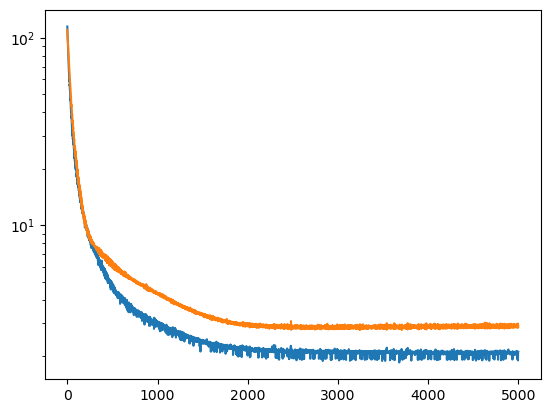

In [294]:
lr_model_history.history.keys()
plt.plot(np.array(lr_model_history.history['loss'])**0.5)
plt.plot(np.array(lr_model_history.history['val_loss'])**0.5)
plt.yscale('log')

3/3 [==============================] - 0s 1ms/step
(67,) (67, 1)


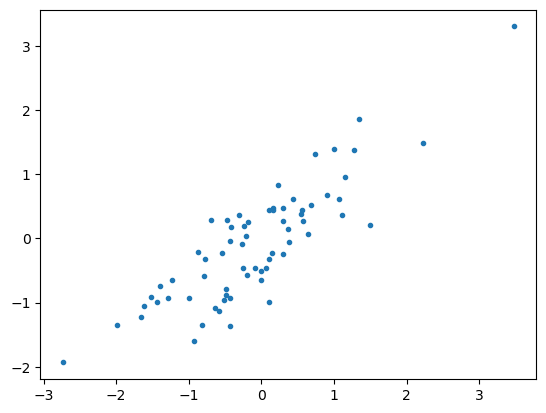

(-0.0844437246240482, 0.5073193454244951)

In [295]:
# predictions = model.predict([ΔRV_k[:,150:].T,bjd_daily[150:]])
predictions = model.predict([X_test,t_test])
print(np.shape(y_test), np.shape(predictions))
# plt.plot(rv_daily[150:] - np.mean(rv_daily), predictions,'.')
plt.plot(y_test, predictions,'.')
plt.show()
weighted_avg_and_std(predictions[:,0]-y_test, weights=1/σrv_daily_test**2)

In [296]:
# This is the final amp prediction!
para = np.asarray(model.layers[-1].get_weights())
print(10.**para)
print(100.*para)

[[[0.00405247]]

 [[1.2694674 ]]

 [[1.2662119 ]]]
[[[-239.22798 ]]

 [[  10.362153]]

 [[  10.250636]]]


In [ ]:
lr_model_history.history.keys()
plt.plot(lr_model_history.history['loss'])
plt.plot(lr_model_history.history['val_loss'])
plt.yscale('log')

In [ ]:
lr_model_history.history['loss'][-1]**0.5, lr_model_history.history['val_loss'][-1]**0.5

In [ ]:
predictions = model.predict([X_test,t_test])
print(np.shape(y_test), np.shape(predictions))
plt.plot(y_test,predictions,'.')
plt.show()
weighted_avg_and_std(predictions[:,0]-y_test, weights=1/σrv_daily_test**2)

In [ ]:
plt.plot(model.layers[1].get_weights()[0], 'o-')

In [ ]:
plt.plot(bjd_daily, weighted_avg_2D(X, weights=model.layers[1].get_weights()[0].flatten()), 'r.', label='weighted average (prediction)')
plt.plot(bjd_daily, Y, 'b.', label='RV_daily')
# plt.xlim([min(bjd_daily), max(bjd_daily) ])
plt.legend()
plt.show()

In [ ]:
# plt.rcParams['font.size'] = '14'

# fig = plt.figure(figsize=(16, 4))
# plt.errorbar(bjd, rv-np.mean(rv_daily), σrv, marker='.', ms=5, color='black', ls='none', alpha=0.005)
# plt.plot(bjd_daily, rv_daily-np.mean(rv_daily), marker='.', ms=10, color='black', ls='-', alpha=0.5, label='NEID Solar RV (daily binned)')
# plt.plot(bjd_daily, weighted_avg_2D(X, weights=model.layers[1].get_weights()[0].flatten()), marker='.', ms=10, color='blue', ls='-', alpha=0.5, label='FIESTA prediction')
# plt.ylim([np.median(rv-np.mean(rv_daily))-4, np.median(rv-np.mean(rv_daily))+5])
# plt.title('NEID Solar RV (Year 2021) and FIESTA prediction')
# plt.xlabel('BJD')
# plt.ylabel('RV (m/s)')
# plt.legend(loc=2)
# # plt.savefig('../Figures/Postdoc application/NEID Solar RV (Year 2021) and FIESTA prediction.png')
# plt.show()

In [ ]:
plt.rcParams['font.size'] = '14'

fig = plt.figure(figsize=(16, 4))
plt.errorbar(bjd, rv-np.mean(rv_daily), σrv, marker='.', ms=5, color='black', ls='none', alpha=0.005)
plt.plot(bjd_daily, rv_daily-np.mean(rv_daily), marker='.', ms=10, color='black', ls='-', alpha=0.5, label='NEID Solar RV (daily binned)')
plt.plot(bjd_daily, weighted_avg_2D(X, weights=model.layers[1].get_weights()[0].flatten()), marker='.', ms=10, color='blue', ls='-', alpha=0.5, label='FIESTA prediction')
plt.ylim([np.median(rv-np.mean(rv_daily))-4, np.median(rv-np.mean(rv_daily))+5])
plt.title('NEID Solar RV (Year 2021) and FIESTA prediction')
plt.xlabel('BJD')
plt.ylabel('RV (m/s)')
plt.legend(loc=2)
plt.savefig('../Figures/Postdoc application/NEID Solar RV (Year 2021) and FIESTA prediction.png')
plt.show()

## Inject planet amplitudes from 0.01 to 100 m/s

In [ ]:
X = ΔRV_k.T
Y = rv_daily - np.mean(rv_daily)

run = 100
amp = np.logspace(-2, 2, run)
amp_pred = np.zeros(run)
weights = np.zeros((run, RV_FT_k.shape[0]))

for i in range(run):
    y = Y + amp[i] * np.sin(bjd_daily)
    X_train, X_test, y_train, y_test, t_train, t_test, σrv_daily_train, σrv_daily_test = train_test_split(
                                X, y, t, σrv_daily, test_size=0.33, random_state=random.randint(0, 10000))
    model = Model()
    model.compile(loss=custom_loss, optimizer='adam')
    model.fit([X_train,t_train],y_train, epochs=2000, verbose=0)    
       
    weights[i,:] = model.layers[1].get_weights()[0].flatten()
    sine_amp = model.layers[-1].get_weights()[0]
    amp_pred[i] = 10.**sine_amp

In [ ]:
np.mean(σrv_daily)

In [ ]:
fig = plt.figure(figsize=(8, 6))
plt.plot(amp, amp, 'k--')
plt.plot(amp, amp_pred, 'o', alpha=0.5)
plt.xlabel('True amplitude [m/s]')
plt.ylabel('Predicted amplitude [m/s]')
plt.xlim([0.009, 5])
plt.ylim([0.009, 5])
plt.xscale('log')
plt.yscale('log')
plt.savefig('../Figures/Postdoc application/planet recovery.png')
plt.show()

## 0 m/s planet amplitudes test

In [ ]:
X = ΔRV_k.T
Y = rv_daily - np.mean(rv_daily)

run = 100
# amp = np.linspace(0.1, 5, run)
amp_pred = np.zeros(run)
weights = np.zeros((run, RV_FT_k.shape[0]))

for i in range(run):
    y = Y 
    X_train, X_test, y_train, y_test, t_train, t_test, σrv_daily_train, σrv_daily_test = train_test_split(
                                X, y, t, σrv_daily, test_size=0.33, random_state=random.randint(0, 10000))    
    model = Model()
    model.compile(loss=custom_loss, optimizer='adam')
    model.fit([X_train,t_train],y_train, epochs=2000, verbose=0) 
       
    weights[i,:] = model.layers[1].get_weights()[0].flatten()
    sine_amp = model.layers[-1].get_weights()[0]
    amp_pred[i] = 10.**sine_amp

In [ ]:
# plt.plot(amp, amp, '-')
plt.plot(amp_pred, 'o')
plt.xlabel('Run')
plt.ylabel('Predicted amplitude [m/s]')
plt.yscale('log')
plt.show()

In [ ]:
np.std(amp_pred)

In [ ]:
plt.plot((weights.T), 'o-', alpha=0.1)
plt.plot((np.median(weights,axis=0).T), 'ko-', alpha=1)
plt.xlabel('mode')
plt.ylabel('weights')
plt.show()    

In [ ]:
# plt.plot(weights[:,0], weights[:,1], '.')

# Train-test split on the NEID solar data by trunks

In [ ]:
X = ΔRV_k.T
Y = rv_daily - np.mean(rv_daily) #+ 0.1*np.sin((bjd_daily-min(bjd_daily))*10)
print(X.shape, Y.shape)

input_dim = X.shape[1]
lr_model = Sequential()
lr_model.add(Dense(1, activation=tf.keras.activations.linear, kernel_initializer='uniform', 
                input_dim = input_dim))

for i in range(4):
    kk = i+1
    _, y_test, y_pred, σrv_test, bjd_test, std = model_MLP(X, Y, bjd_daily, σrv_daily, lr_model, epochs=2500, learning_rate=1e-3, kk=kk)

    fig = plt.figure(figsize=(16, 4))
    plt.plot(bjd_test, y_pred, 'o', markersize=5, label='res wrms = {0:.2f} m/s'.format(std))
    plt.plot(bjd_daily, Y, 'o', alpha=0.4, label=r'$RV_{NEID}$')
    plt.title('NEID Solar RV 2021')
    plt.xlabel('BJD')
    plt.ylabel('RV (m/s)')
    plt.legend()
    plt.show()

In [ ]:
X = ΔRV_k.T
Y = rv_daily - np.mean(rv_daily) 
print(X.shape, Y.shape)

input_dim = X.shape[1]
lr_model = Sequential()
lr_model.add(Dense(1, activation=tf.keras.activations.linear, kernel_initializer='uniform', 
                input_dim = input_dim))

for i in range(4):
    kk = i+1
    _, y_test, y_pred, σrv_test, bjd_test, std = model_MLP(X, Y, bjd_daily, σrv_daily, lr_model, epochs=1500, learning_rate=1e-3, kk=kk)

    fig = plt.figure(figsize=(16, 4))
    plt.plot(bjd_test, y_pred, 'o', markersize=5, label='res wrms = {0:.2f} m/s'.format(std))
    plt.plot(bjd_daily, Y, 'o', alpha=0.4, label=r'$RV_{NEID}$')
    plt.title('NEID Solar RV 2021')
    plt.xlabel('BJD')
    plt.ylabel('RV (m/s)')
    plt.legend()
    plt.show()

In [ ]:
lr_model_history.history.keys()

In [ ]:
# lr_model_history.history['loss']
fig, ax = plt.subplots(1, 1)
ax.plot(np.sqrt(lr_model_history.history['custom_mse']), 'b', label='train')    
ax.plot(np.sqrt(lr_model_history.history['val_custom_mse']), 'r' ,label='test')
# ax.plot(np.sqrt(lr_model_history.history['loss']), 'b', label='train_loss')    

ax.set_xlabel(r'Epoch')
ax.set_ylabel(r'wmse')
# ax.set_yscale('log')
ax.legend()
ax.tick_params(labelsize=20)
ax.grid()
# ax.set_xlim([20, epochs])
# ax.set_ylim([0, 2])
plt.show()


In [ ]:
RMS = np.zeros(101)
AMP = np.linspace(-5,5,101)
for i in range(101):
    Y = rv_daily - np.mean(rv_daily) + AMP[i]*np.sin((bjd_daily-min(bjd_daily))*10)
    input_dim = X.shape[1]
    lr_model = Sequential()
    lr_model.add(Dense(16, activation=tf.keras.activations.linear, kernel_initializer='uniform', 
                    input_dim = input_dim)) 
    lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))
    lr_model, y_test, y_pred, σrv_test, bjd_test, std = model_MLP(X, Y, bjd_daily, σrv_daily, lr_model, epochs=2000, learning_rate=5e-4)
    RMS[i] = std

In [ ]:
plt.plot(AMP, RMS)
plt.xlabel('amplitude')
plt.ylabel('rms')
plt.show()

wrms = 0.27

In [ ]:
y_test2, y_pred2, σrv_test2, bjd_test2 = y_test, y_pred, σrv_test, bjd_test

wrms = 0.287

In [ ]:
y_test1, y_pred1, σrv_test1, bjd_test1 = y_test, y_pred, σrv_test, bjd_test

wrms = 0.365

In [ ]:
y_test3, y_pred3, σrv_test3, bjd_test3 = y_test, y_pred, σrv_test, bjd_test

wrms = 0.500

In [ ]:
y_test4, y_pred4, σrv_test4, bjd_test4 = y_test, y_pred, σrv_test, bjd_test

In [ ]:
fig = plt.figure(figsize=(16, 4))
plt.plot(bjd_test1, y_pred1, 'o', markersize=5, label='wrms = 0.29 m/s')
plt.plot(bjd_test2, y_pred2, 'o', markersize=5, label='wrms = 0.27 m/s')
plt.plot(bjd_test3, y_pred3, 'o', markersize=5, label='wrms = 0.37 m/s')
plt.plot(bjd_test4, y_pred4, 'o', markersize=5, label='wrms = 0.50 m/s')
plt.plot(bjd_daily, np.hstack((y_test1, y_test2, y_test3, y_test4)), 'o', alpha=0.4, label=r'$RV_{NEID}$')
plt.title('NEID Solar RV 2021')
plt.xlabel('BJD')
plt.ylabel('RV (m/s)')
plt.legend()
plt.show()

# Try other NN configurations

In [ ]:
X = ΔRV_k.T[:,0:23]
# X = ΔRV_k.T
Y = rv_daily - np.mean(rv_daily)
print(X.shape, Y.shape)
###################
# build the model #
###################
input_dim = X.shape[1]
lr_model = Sequential()
# lr_model.add(Dense(32, activation=tf.nn.relu, kernel_initializer='uniform', 
#                 input_dim = input_dim)) 
# lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(16, activation=tf.keras.activations.linear, kernel_initializer='uniform', 
                input_dim = input_dim)) # add bias term!
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.tanh))
lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))

y_test, y_pred = model_MLP(X, Y, lr_model, epochs=10000, learning_rate=1e-3)

In [ ]:
# X = ΔRV_k.T[:,0:10]
X = RV_FT_k.T
Y = rv_daily - np.mean(rv_daily)
print(X.shape, Y.shape)
###################
# build the model #
###################
input_dim = X.shape[1]
lr_model = Sequential()
# lr_model.add(Dense(32, activation=tf.nn.relu, kernel_initializer='uniform', 
#                 input_dim = input_dim)) 
# lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(16, activation=tf.keras.activations.linear, kernel_initializer='uniform', 
                input_dim = input_dim)) # add bias term!
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.tanh))
lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))

y_test, y_pred = model_MLP(X, Y, lr_model, epochs=10000, learning_rate=1e-3)

In [ ]:
lr_model = Sequential()
lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))

y_test, y_pred = model_MLP(X, Y, lr_model, epochs=5000, learning_rate=1e-3)

In [ ]:
# X = ΔRV_k.T[:,0:10]
X = ΔRV_k.T
Y = rv_daily - np.mean(rv_daily)
print(X.shape, Y.shape)
###################
# build the model #
###################
input_dim = X.shape[1]
lr_model = Sequential()
# lr_model.add(Dense(32, activation=tf.nn.relu, kernel_initializer='uniform', 
#                 input_dim = input_dim)) 
# lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(40, activation=tf.keras.activations.linear, kernel_initializer='uniform', 
                input_dim = input_dim)) # add bias term!
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.tanh))
lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))

y_test, y_pred = model_MLP(X, Y, lr_model, epochs=500, learning_rate=1e-3)

In [ ]:
# X = ΔRV_k.T[:,0:10]
X = ΔRV_k.T
Y = rv_daily - np.mean(rv_daily)
print(X.shape, Y.shape)
###################
# build the model #
###################
input_dim = X.shape[1]
lr_model = Sequential()
# lr_model.add(Dense(32, activation=tf.nn.relu, kernel_initializer='uniform', 
#                 input_dim = input_dim)) 
# lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(16, activation=tf.keras.activations.linear, kernel_initializer='uniform', 
                input_dim = input_dim)) # add bias tern!
# lr_model.add(Dropout(0.1))
# lr_model.add(Dense(40, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(4, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.tanh))
lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))

y_test, y_pred = model_MLP(X, Y, lr_model, epochs=1000, learning_rate=1e-3)



In [ ]:
X = ΔRV_k.T[:,0:30]
# X = ΔRV_k.T
Y = rv_daily - np.mean(rv_daily)
print(X.shape, Y.shape)
###################
# build the model #
###################
input_dim = X.shape[1]
lr_model = Sequential()
# lr_model.add(Dense(32, activation=tf.nn.relu, kernel_initializer='uniform', 
#                 input_dim = input_dim)) 
# lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(16, activation=tf.keras.activations.linear, kernel_initializer='uniform', 
                input_dim = input_dim)) # add bias term!
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.tanh))
lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))

y_test, y_pred = model_MLP(X, Y, lr_model,  epochs=500, learning_rate=1e-3)

In [ ]:
X = CCF_daily.T
Y = rv_daily - np.mean(rv_daily)
print(X.shape, Y.shape)
###################
# build the model #
###################
# lr_model = Sequential()
# lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))
lr_model, y_test, y_pred, σrv_test, bjd_test, std  = model_MLP(X, Y, bjd_daily, σrv_daily, lr_model, epochs=10000, learning_rate=1e-4)

# y_test, y_pred = model_MLP(X, Y, lr_model,  epochs=50000, learning_rate=5e-3)